In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn i mport datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [102]:
# import some data to play with
iris = pd.read_csv('/Users/chira/Downloads/Iris.csv',index_col=0)

In [103]:
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [104]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [105]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [106]:
iris.iloc[:,0:4]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
1              5.1           3.5            1.4           0.2
2              4.9           3.0            1.4           0.2
3              4.7           3.2            1.3           0.2
4              4.6           3.1            1.5           0.2
5              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
146            6.7           3.0            5.2           2.3
147            6.3           2.5            5.0           1.9
148            6.5           3.0            5.2           2.0
149            6.2           3.4            5.4           2.3
150            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [11]:
x=iris.iloc[:,0:4]
y=iris['Species']


In [12]:
x

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
1              5.1           3.5            1.4           0.2
2              4.9           3.0            1.4           0.2
3              4.7           3.2            1.3           0.2
4              4.6           3.1            1.5           0.2
5              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
146            6.7           3.0            5.2           2.3
147            6.3           2.5            5.0           1.9
148            6.5           3.0            5.2           2.0
149            6.2           3.4            5.4           2.3
150            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [13]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [107]:
iris['Species'].unique()

array([0, 1, 2])

In [108]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [109]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [110]:
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [111]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [112]:
x_train

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
63            6.0           2.2            4.0           1.0
24            5.1           3.3            1.7           0.5
27            5.0           3.4            1.6           0.4
49            5.3           3.7            1.5           0.2
3             4.7           3.2            1.3           0.2
..            ...           ...            ...           ...
72            6.1           2.8            4.0           1.3
13            4.8           3.0            1.4           0.1
51            7.0           3.2            4.7           1.4
8             5.0           3.4            1.5           0.2
71            5.9           3.2            4.8           1.8

[120 rows x 4 columns]

In [80]:
y_train

Id
63    1
24    0
27    0
49    0
3     0
     ..
72    1
13    0
51    1
8     0
71    1
Name: Species, Length: 120, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria

In [113]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

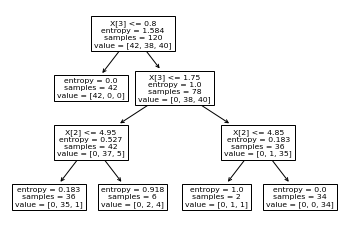

In [114]:
#PLot the decision tree
tree.plot_tree(model);


In [91]:
y_train.value_counts()

0    42
2    40
1    38
Name: Species, dtype: int64

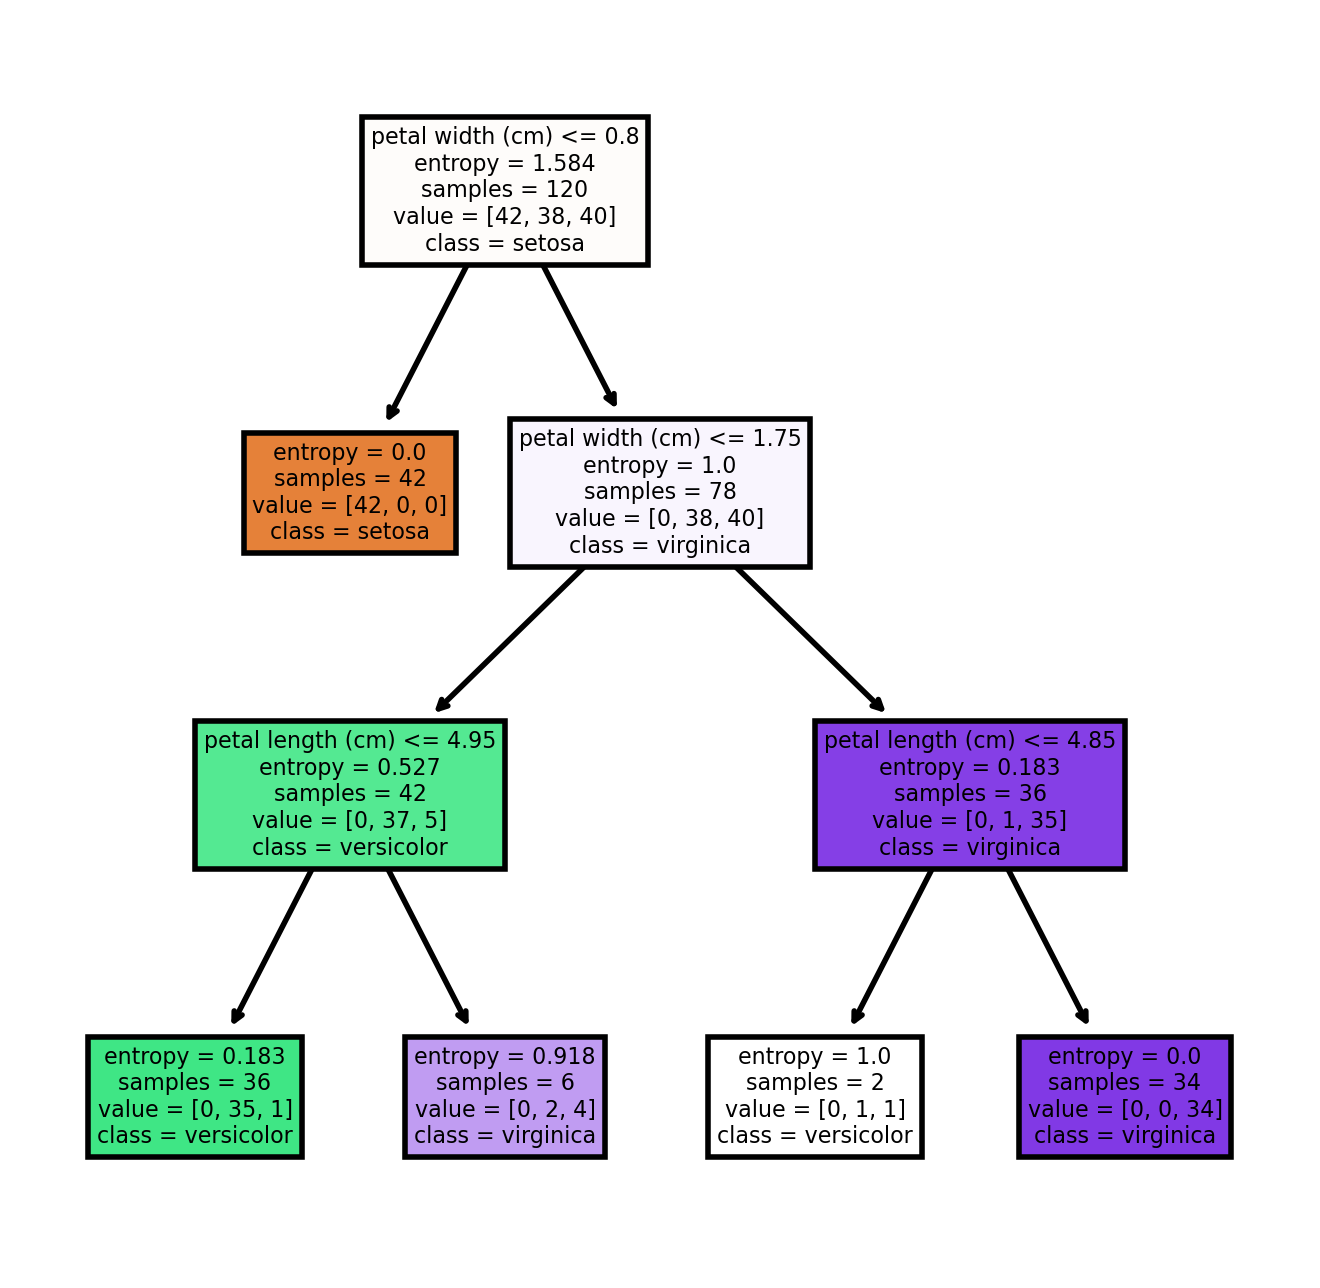

In [115]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [120]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [121]:
y_test

Id
39     0
67     1
116    2
118    2
90     1
137    2
69     1
95     1
85     1
29     0
91     1
12     0
41     0
127    2
80     1
145    2
124    2
125    2
77     1
60     1
133    2
106    2
54     1
18     0
65     1
19     0
14     0
117    2
10     0
82     1
Name: Species, dtype: int64

In [122]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1], dtype=int64)

In [96]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0    0   1  2
Species          
0        8   0  0
1        0  12  0
2        0   1  9

In [97]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

In [70]:
y_test[127:]

Series([], Name: Species, dtype: int64)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [125]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [126]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [128]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

#### Decision Tree Regression Example

In [129]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [130]:
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
Id                                                                   
1             5.1           3.5            1.4           0.2        0
2             4.9           3.0            1.4           0.2        0
3             4.7           3.2            1.3           0.2        0
4             4.6           3.1            1.5           0.2        0
5             5.0           3.6            1.4           0.2        0

In [131]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [133]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [134]:
#Find the accuracy
model.score(X_test,y_test)

0.9381443298969072